In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")
sns.set_palette("dark")

from pipeline.preprocessing import preprocess
from pipeline.walkforward import WFCVGenerator
from config.config_types import AppConfig
import torch

from utils.paths import CONFIG_DIR, SP500COPY_PATH, SP500_PATH, DATA_DIR, VOL_EXPERIMENTS_DIR

DEVICE = "cuda"

In [3]:
df_sp = pd.read_parquet(SP500_PATH)
df_sp

,permno,date,ret,close,vol,open,high,low,cfacpr
0,10078,2000-01-03,-0.012107,76.5,15270527.0,79.25,79.375,74.5,0.5
1,10078,2000-01-04,-0.062092,71.75,21098710.0,73.4375,75.25,71.5,0.5
2,10078,2000-01-05,0.001742,71.875,30073258.0,70.125,73.5,66.625,0.5
3,10078,2000-01-06,-0.053913,68.0,22741999.0,70.4375,71.875,67.0,0.5
4,10078,2000-01-07,0.056985,71.875,20450260.0,67.1875,72.0,66.75,0.5
...,...,...,...,...,...,...,...,...,...
155298,93436,2024-12-24,0.073572,462.28,59351506.0,435.89999,462.78,435.14001,1.0
155299,93436,2024-12-26,-0.01763,454.13,76392273.0,465.16,465.3299,451.01999,1.0
155300,93436,2024-12-27,-0.049479,431.66,82370345.0,449.51999,450.0,426.5,1.0
155301,93436,2024-12-30,-0.033012,417.41,64705452.0,419.39999,427.0,415.75,1.0


- de-comment this to predict a single stock and see how it performs in predicting

<Axes: >

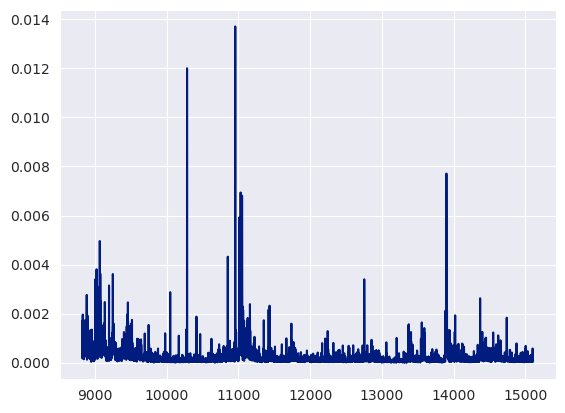

In [4]:
df = preprocess()

#permno = np.random.choice(df["permno"].unique())
#print(permno)
permno = 10107 # MSFT
df_permno = df[df["permno"]==permno]
df_permno["var"].plot(kind="line")

In [5]:
#df_permno["t"] = range(len(df_permno))
#df_permno 

In [54]:
cfg_mlp = AppConfig.from_dict(f"{CONFIG_DIR}/vol_mlp.yaml")
cfg_cnn = AppConfig.from_dict(f"{CONFIG_DIR}/vol_cnn.yaml")
cfg_lstm = AppConfig.from_dict(f"{CONFIG_DIR}/vol_lstm.yaml")
cfg_cnn.walkforward.lags = 40
wf = WFCVGenerator(cfg_cnn.walkforward, df_long=df_permno)
#wf = WFCVGenerator(cfg_lstm.walkforward)
wf.df_master

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,y,window
0,0.001633,0.000877,0.001704,0.001076,0.000759,0.000168,0.001103,0.000623,0.001896,0.001958,...,0.000285,0.000427,0.000957,0.000747,0.000840,0.000522,0.000905,0.000241,0.001694,"(0, 40)"
1,0.000877,0.001704,0.001076,0.000759,0.000168,0.001103,0.000623,0.001896,0.001958,0.000499,...,0.000427,0.000957,0.000747,0.000840,0.000522,0.000905,0.000241,0.001694,0.000929,"(1, 41)"
2,0.001704,0.001076,0.000759,0.000168,0.001103,0.000623,0.001896,0.001958,0.000499,0.000879,...,0.000957,0.000747,0.000840,0.000522,0.000905,0.000241,0.001694,0.000929,0.001266,"(2, 42)"
3,0.001076,0.000759,0.000168,0.001103,0.000623,0.001896,0.001958,0.000499,0.000879,0.000587,...,0.000747,0.000840,0.000522,0.000905,0.000241,0.001694,0.000929,0.001266,0.001738,"(3, 43)"
4,0.000759,0.000168,0.001103,0.000623,0.001896,0.001958,0.000499,0.000879,0.000587,0.000355,...,0.000840,0.000522,0.000905,0.000241,0.001694,0.000929,0.001266,0.001738,0.001268,"(4, 44)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6244,0.000033,0.000115,0.000059,0.000102,0.000185,0.000066,0.000115,0.000151,0.000098,0.000045,...,0.000121,0.000082,0.000083,0.000057,0.000238,0.000080,0.000575,0.000057,0.000032,"(6244, 6284)"
6245,0.000115,0.000059,0.000102,0.000185,0.000066,0.000115,0.000151,0.000098,0.000045,0.000175,...,0.000082,0.000083,0.000057,0.000238,0.000080,0.000575,0.000057,0.000032,0.000046,"(6245, 6285)"
6246,0.000059,0.000102,0.000185,0.000066,0.000115,0.000151,0.000098,0.000045,0.000175,0.000098,...,0.000083,0.000057,0.000238,0.000080,0.000575,0.000057,0.000032,0.000046,0.000178,"(6246, 6286)"
6247,0.000102,0.000185,0.000066,0.000115,0.000151,0.000098,0.000045,0.000175,0.000098,0.000317,...,0.000057,0.000238,0.000080,0.000575,0.000057,0.000032,0.000046,0.000178,0.000085,"(6247, 6287)"


In [55]:
wf_ols = WFCVGenerator(cfg_lstm.walkforward)
wf_ols.df_master


data_ols = {}



for i, fold_data in enumerate(wf.folds()):
    size = fold_data[4]
    y_test = fold_data[5]

    data_ols[i] = fold_data
    print(i)
    #if i == fold_num:
    #    break


Xtr, ytr, Xv, yv, Xte, yte, Xtr_val, ytr_val, Xte_merged, yte_merged = data_ols[0]

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# 1. Helper to flatten 3D/2D time-series data for OLS
def prepare_sklearn_input(X):
    X = np.asarray(X)
    if X.ndim == 3: # (N, T, D) -> (N, T*D)
        N, T, D = X.shape
        return X.reshape(N, -1)
    elif X.ndim == 2: # (N, T) -> (N, T)
        return X
    return X

# 2. Prepare the data
# Xtr_val is your training set, Xte is your test set
X_train_ols = prepare_sklearn_input(Xtr_val)
X_test_ols  = prepare_sklearn_input(Xte)

# Ensure targets are the right shape (N,) or (N, 1)
y_train_ols = np.asarray(ytr_val)
y_test_truth = np.asarray(yte)

# 3. Fit OLS
ols_model = LinearRegression()
ols_model.fit(X_train_ols, y_train_ols)

# 4. Predict
y_pred_ols = ols_model.predict(X_test_ols)
print(y_pred_ols.shape)

# 5. Check Metrics
# Flatten both for safe comparison
mse_ols = mean_squared_error(y_test_truth.ravel(), y_pred_ols.ravel())
print(f"OLS Test MSE: {mse_ols:.6f}")

0
(1176,)
OLS Test MSE: 0.484361


In [56]:
test_data = {}
data = {}



for i, fold_data in enumerate(wf.folds()):
    size = fold_data[4]
    y_test = fold_data[5]

    test_data[i] = [size, y_test]
    data[i] = fold_data
    print(i)
    #if i == fold_num:
    #    break

0


In [57]:
names = ["exp_022_mlp_40_search", "exp_023_cnn_40_search", "exp_024_lstm_40_search"]
names = sorted(names)
print(names)
cfgs = [cfg_mlp, cfg_cnn, cfg_lstm]
trials = ["trial_search_best"]*6
fold_num = 0

base_paths = [f"{VOL_EXPERIMENTS_DIR}/{name}/{trial}/" for name, trial in zip(names, trials)]
ckpt_paths = [f"{base}fold_{fold_num:03d}/model_best.pt" for base in base_paths]

checkpoints = [torch.load(ckpt_path, map_location=DEVICE) for ckpt_path in ckpt_paths]

# Assigning specific checkpoints to variables for clarity
checkpoint_mlp, checkpoint_cnn, checkpoint_lstm = checkpoints


['exp_022_mlp_40_search', 'exp_023_cnn_40_search', 'exp_024_lstm_40_search']


In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import torch
import numpy as np
from models import create_model

def _prepare_X_for_ols(X: np.ndarray) -> np.ndarray:
    X = np.asarray(X)
    if X.ndim == 1:
        return X.reshape(-1, 1)
    if X.ndim == 2:
        return X
    if X.ndim == 3:
        N, T, D = X.shape
        return X.reshape(N, T * D)
    raise ValueError(f"Unexpected X shape for OLS: {X.shape}")

# Replace the existing _infer_input_shape with this version
def _infer_input_shape(cfg, X_sample, state_dict):
    """
    Infer model input_shape from a sample.
    Accepts:
      (T,)          -> univariate row
      (T,D)         -> multivariate row
      (N,T)         -> whole univariate batch
      (N,T,D)       -> whole multivariate batch
    Returns shapes expected by create_model for each architecture.
    """
    name = cfg.model.name.lower()
    shape = X_sample.shape
    # Remove leading batch dimension if accidentally passed
    if X_sample.ndim == 2 and name == "lstm" and shape[0] != cfg.walkforward.lags and shape[1] == cfg.walkforward.lags:
        # Probably (N,T); leave as handled below
        pass

    if name == "lstm":
        # LSTM expects (T,D)
        if X_sample.ndim == 1:              # (T,)
            return (shape[0], 1)
        elif X_sample.ndim == 2:
            if shape[0] == cfg.walkforward.lags and shape[1] != 1:
                # row already (T,D)
                return (shape[0], shape[1])
            elif shape[1] == cfg.walkforward.lags:
                # batch (N,T) -> treat as univariate features
                return (shape[1], 1)
            else:
                # row (T,1) or (T,D)
                return (shape[0], shape[1])
        elif X_sample.ndim == 3:            # (N,T,D)
            return (shape[1], shape[2])
        else:
            raise ValueError(f"Unexpected LSTM sample shape: {shape}")

    elif name == "simplecnn":
        # CNN expects (C,L) with C=1
        if X_sample.ndim == 1:              # (T,)
            return (1, shape[0])
        elif X_sample.ndim == 2:
            if shape[1] == cfg.walkforward.lags and shape[0] != 1:
                # (N,T) batch -> length = T
                return (1, shape[1])
            elif shape[0] == 1:             # (1,T)
                return (1, shape[1])
            else:                           # (T,D) flattened later
                return (1, shape[0]*shape[1])
        elif X_sample.ndim == 3:            # (N,T,D)
            return (1, shape[1])            # treat D collapsed upstream
        else:
            raise ValueError(f"Unexpected CNN sample shape: {shape}")

    elif name == "mlp":
        # MLP expects flattened window (T,) (or T*D)
        if X_sample.ndim == 1:              # (T,)
            return (shape[0],)
        elif X_sample.ndim == 2:
            if shape[1] == cfg.walkforward.lags and shape[0] != cfg.walkforward.lags:
                # (N,T) batch
                return (shape[1],)
            else:                           # (T,D)
                return (shape[0]*shape[1],)
        elif X_sample.ndim == 3:            # (N,T,D)
            return (shape[1]*shape[2],)
        else:
            raise ValueError(f"Unexpected MLP sample shape: {shape}")

    else:
        raise ValueError(f"Unknown model {cfg.model.name}")

@torch.inference_mode()
def _prepare_batch(cfg, x_row):
    name = cfg.model.name.lower()
    # x_row is a single sample slice from X_test
    if name == "mlp":
        if x_row.ndim == 1:
            xb = torch.as_tensor(x_row, dtype=torch.float32).unsqueeze(0)
        elif x_row.ndim == 2:
            xb = torch.as_tensor(x_row.reshape(-1), dtype=torch.float32).unsqueeze(0)
        else:
            raise ValueError
    elif name == "simplecnn":
        # expect (N, C, L); x_row maybe (T,) or (T,D)
        if x_row.ndim == 1:
            xb = torch.as_tensor(x_row, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
        elif x_row.ndim == 2:
            # collapse feature dim
            x_flat = x_row.reshape(-1)
            xb = torch.as_tensor(x_flat, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
        else:
            raise ValueError
    elif name == "lstm":
        # expect (N, T, D)
        if x_row.ndim == 1:
            xb = torch.as_tensor(x_row, dtype=torch.float32).unsqueeze(0).unsqueeze(-1)
        elif x_row.ndim == 2:
            xb = torch.as_tensor(x_row, dtype=torch.float32).unsqueeze(0)
        else:
            raise ValueError
    else:
        raise ValueError
    return xb

def build_model_from_checkpoint(cfg, checkpoint, X_example):
    state_dict = {k.replace("_orig_mod.", ""): v for k, v in checkpoint["model_state"].items()}
    input_shape = _infer_input_shape(cfg, X_example, state_dict)
    output_shape = cfg.walkforward.lookback + 1 if cfg.walkforward.lookback is not None else 1
    model = create_model(cfg.model, input_shape, output_shape)
    model.load_state_dict(state_dict, strict=True)
    model.to(DEVICE).eval()
    return model

@torch.inference_mode()
def infer_sequential(model, cfg, X_test, y_test, limit=None, autoregressive=False, device="cuda"):
    """
    Sequential single-row inference over chronologically sorted X_test.
    For autoregressive=True, we start from X_test[0] and then roll forward
    using our own predictions.
    Returns (y_true, preds) with shape (N, output_dim).
    """
    preds = []
    limit = len(X_test) if limit is None else limit

    if autoregressive:
        # Keep a *list* of windows; each window has same shape as X_test[0]
        X_ar = [np.array(X_test[0], copy=True)]
    else:
        X_ar = None

    for i in range(limit):
        if autoregressive:
            # Always feed the *last* window in the autoregressive buffer
            x_in = X_ar[-1]
        else:
            x_in = X_test[i]

        # Debug: check shapes
        # print("x_in shape:", np.asarray(x_in).shape)

        xb = _prepare_batch(cfg, x_in).to(device)  # should match training input shape
        pb = model(xb).detach().cpu().numpy().reshape(-1)  # (output_dim,)
        preds.append(pb)

        if autoregressive:
            # assume scalar output; if multi-dim adjust accordingly
            next_val = pb[0]

            # x_in is a window of length L; we drop the first element and append the prediction
            x_in = np.asarray(x_in)
            next_window = np.concatenate([x_in[1:], [next_val]])

            # store new window in buffer
            X_ar.append(next_window)

    preds = np.vstack(preds)  # (N, output_dim)
    y_true = np.asarray(y_test[:limit])
    if y_true.ndim == 1:
        y_true = y_true.reshape(-1, 1)

    return y_true, preds

def plot_forecast_overlay(x_input, y_true, y_pred, title="Forecast overlay", horizon_dim: int = 0):
    """
    Plot with an initial burn-in window (the model input) followed by sequential forecasts.
    Assumes:
      x_input: shape (T,) or (T,D)  -> last observed history used for first prediction
      y_true : shape (N, H) or (N,1)
      y_pred : shape (N, H) or (N,1)
    horizon_dim selects which target dimension to display (default 0).
    """
    # Extract burn-in (history) series
    x_input = np.asarray(x_input)
    if x_input.ndim == 2:
        history = x_input[:, horizon_dim] if x_input.shape[1] > horizon_dim else x_input[:, 0]
    else:
        history = x_input.ravel()

    # Extract forecast true/pred series for chosen horizon dimension
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    if y_true.ndim == 2:
        true_future = y_true[:, horizon_dim] if y_true.shape[1] > horizon_dim else y_true[:, 0]
    else:
        true_future = y_true.ravel()
    if y_pred.ndim == 2:
        pred_future = y_pred[:, horizon_dim] if y_pred.shape[1] > horizon_dim else y_pred[:, 0]
    else:
        pred_future = y_pred.ravel()

    T = len(history)
    F = len(true_future)

    # Build unified time index: negative = burn-in, non-negative = forecast
    idx_history = np.arange(-T, 0)
    idx_future  = np.arange(0, F)

    plt.figure(figsize=(12,4))
    plt.plot(idx_history, history, label="History", color="#555555", lw=2)
    plt.plot(idx_future, true_future, label="True Future", color="#1f77b4", lw=2)
    plt.plot(idx_future, pred_future, label="Predicted Future", color="#d62728", lw=2)

    # Vertical separator at forecast start
    plt.axvline(x=-0.5, color="k", linestyle="--", linewidth=1)
    plt.axhline(y=pred_future[0], color="r", linestyle="--", linewidth=1)

    # Metrics
    if len(true_future) == len(pred_future):
        mse = mean_squared_error(true_future, pred_future)
        plt.text(0.9, 0.97, f"MSE={mse:.4g}",
                 transform=plt.gca().transAxes, va="top", ha="left", fontsize=10,
                 bbox=dict(boxstyle="round", fc="white", alpha=0.6, ec="#cccccc"))

    plt.title(f"{title})")
    plt.xlabel("Time (negative = burn-in history, >=0 = forecast steps)")
    plt.ylabel("Value")
    plt.legend(loc="upper left")
    plt.tight_layout()
    plt.show()
    
# ---- Usage example ----
# Assuming data[fold_num] loaded earlier:
Xtr, ytr, Xv, yv, Xte, yte, Xtr_val, ytr_val, Xte_merged, yte_merged = data[fold_num]
X_test_use = Xte  # or Xte_merged if merge mode
y_test_use = yte
print(X_test_use.shape)



# Forecast model
##--------- First ---------##
model_cnn = build_model_from_checkpoint(cfgs[0], checkpoints[0], X_test_use[0])
#y_true_seq, y_pred_seq_ar_cnn = infer_sequential(model_cnn, cfg_cnn, X_test_use, y_test_use, limit=200, autoregressive=True)
y_true_seq, y_pred_seq_cnn = infer_sequential(model_cnn, cfgs[0], X_test_use, y_test_use, limit=200)
#mse_model_cnn = mean_squared_error(y_true_seq[:, 0], y_pred_seq_ar_cnn[:, 0])
#print(f"Test Model MSE: {mse_model_cnn:.6f}")


##--------- Second ---------##
model_lstm = build_model_from_checkpoint(cfgs[1], checkpoints[1], X_test_use[0])
#y_true_seq, y_pred_seq_ar_lstm = infer_sequential(model_lstm, cfg_lstm, X_test_use, y_test_use, limit=200, autoregressive=True)
y_true_seq, y_pred_seq_lstm = infer_sequential(model_lstm, cfgs[1], X_test_use, y_test_use, limit=200)
#mse_model_lstm = mean_squared_error(y_true_seq[:, 0], y_pred_seq_ar_lstm[:, 0])
#print(f"Test Model LSTM MSE: {mse_model_lstm:.6f}")

##--------- third ---------##
model_mlp = build_model_from_checkpoint(cfgs[2], checkpoints[2], X_test_use[0])
#y_true_seq, y_pred_seq_ar_muon = infer_sequential(model_mlp, cfg_lstm, X_test_use, y_test_use, limit=200, autoregressive=True)
y_true_seq, y_pred_seq_mlp = infer_sequential(model_mlp, cfgs[2], X_test_use, y_test_use, limit=200)
#mse_model_mlp = mean_squared_error(y_true_seq[:, 0], y_pred_seq_ar_lstm[:, 0])
#print(f"Test Model muon MSE: {mse_model_mlp:.6f}")

diff = y_pred_seq_lstm - y_pred_seq_cnn
diff_norm = np.linalg.norm(diff)
print(diff_norm)




(1176, 40)
0.95966583
0.95966583


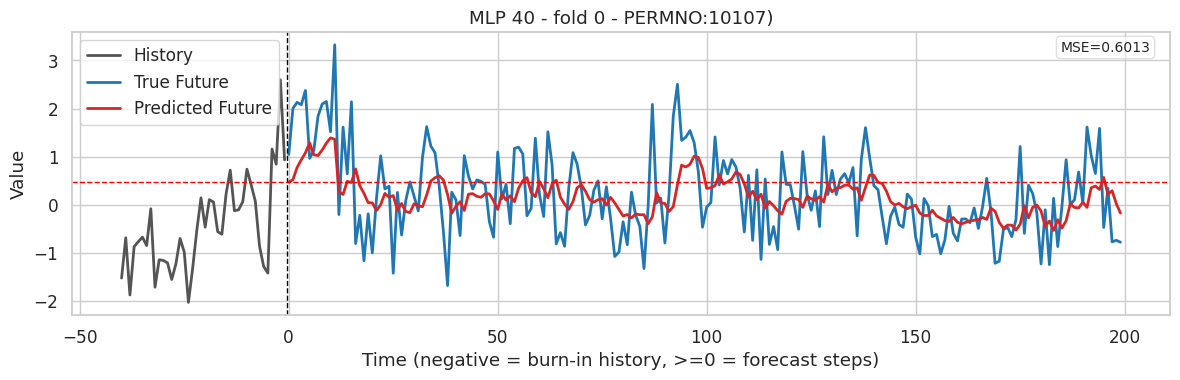

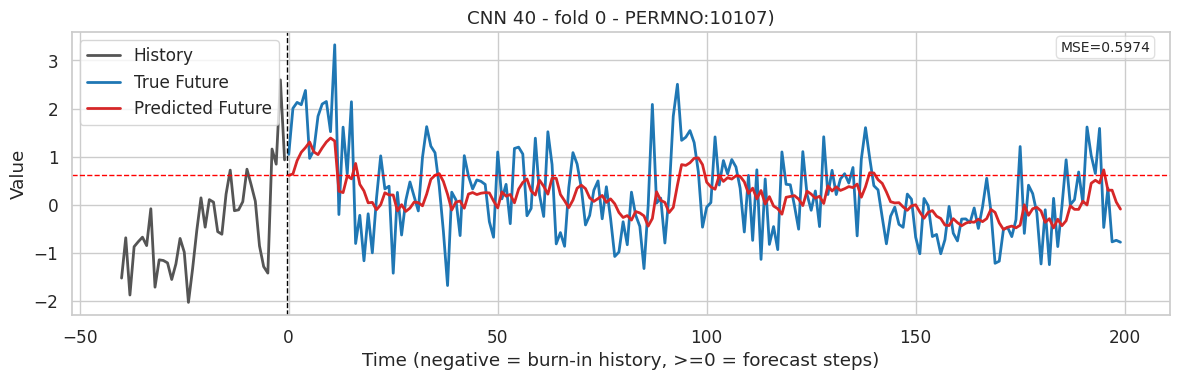

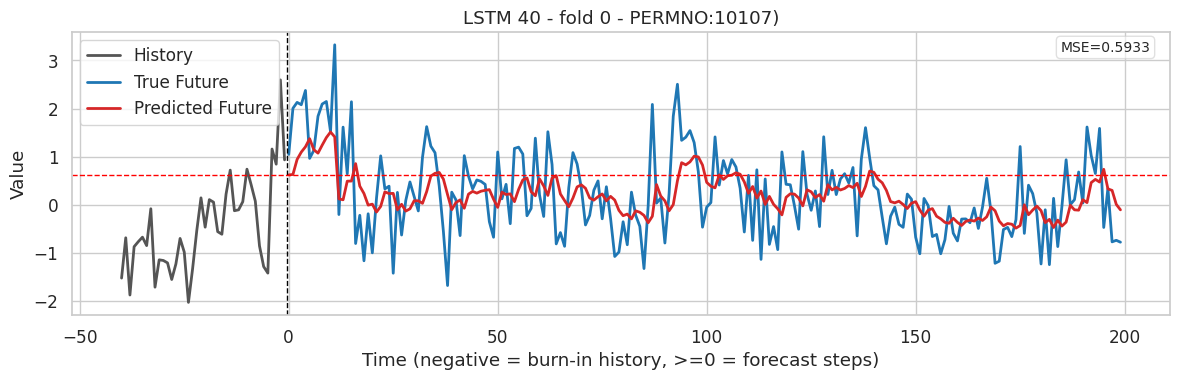

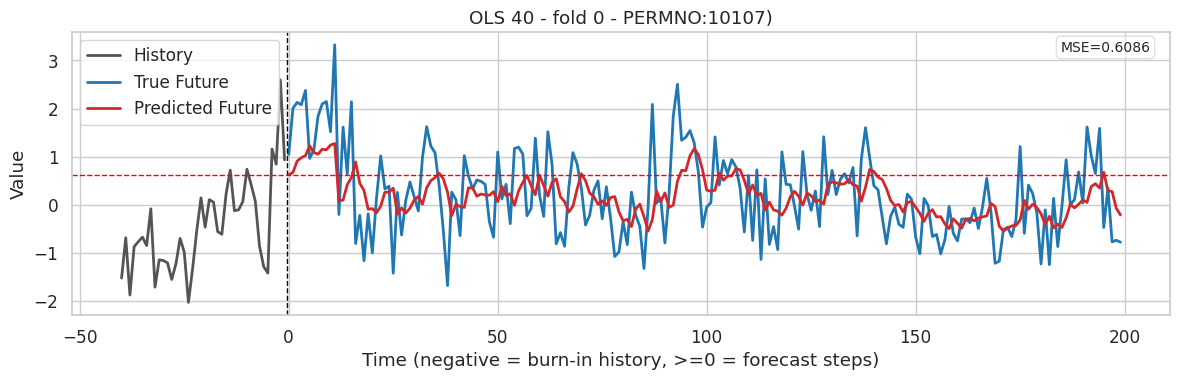

In [62]:

def format_legend_name(raw_name):
    # Split the string by '_'
    parts = raw_name.split('_')
    
    # Check if format is valid to avoid errors
    if len(parts) >= 5:
        # parts[2] = architecture (e.g., cnn)
        # parts[3] = date range/size (e.g., 100)
        # parts[4] = optimizer (e.g., muon)
        
        # Return formatted string, e.g., "CNN 100 MUON"
        return f"{parts[2]} {parts[3]}".upper()
    
    return raw_name # Return original if format doesn't match

# --- 1. To get just a list of names ---
clean_names = [format_legend_name(n) for n in names]

# Print
#plot_forecast_overlay(X_test_use[0], y_true_seq, y_pred_seq_ar_cnn, title=f"{name_cnn} - fold {fold_num} - PERMNO:{permno}")
#plot_forecast_overlay(X_test_use[0], y_true_seq, y_pred_seq_ar_lstm, title=f"{name_lstm} - fold {fold_num} - PERMNO:{permno}")
plot_forecast_overlay(X_test_use[0], y_true_seq, y_pred_seq_cnn, title=f"{clean_names[0]} - fold {fold_num} - PERMNO:{permno}")
plot_forecast_overlay(X_test_use[0], y_true_seq, y_pred_seq_mlp, title=f"{clean_names[1]} - fold {fold_num} - PERMNO:{permno}")
plot_forecast_overlay(X_test_use[0], y_true_seq, y_pred_seq_lstm, title=f"{clean_names[2]} - fold {fold_num} - PERMNO:{permno}")
plot_forecast_overlay(X_test_use[0], y_true_seq, y_pred_ols[:200], title=f"OLS 40 - fold {fold_num} - PERMNO:{permno}")


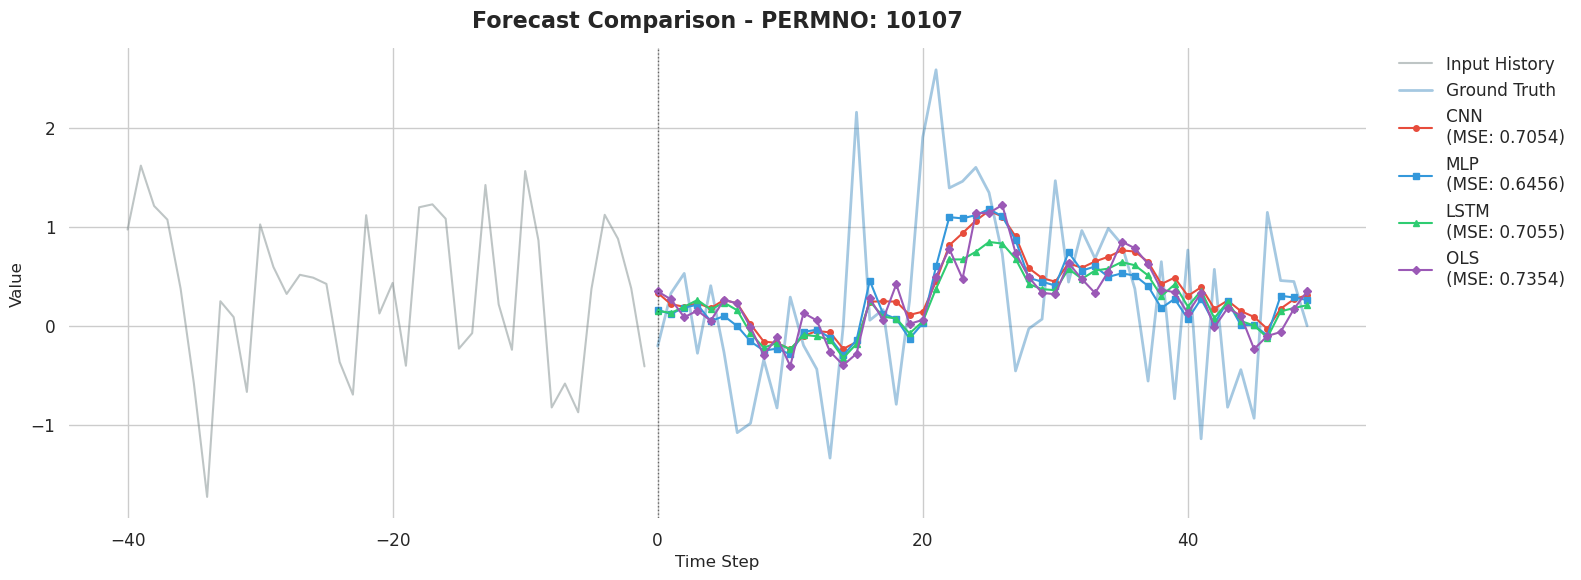

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error

def plot_beautiful_forecasts(x_history, y_true, predictions_dict, title="Model Comparison", zoom_history=30):
    """
    A cleaner, aesthetically pleasing plot for time-series forecasts.
    
    Args:
        zoom_history: Int. How many steps of history to show (e.g., 30). 
                      Set to None to show all history.
    """
    # 1. Setup Style
    sns.set_style("whitegrid")
    sns.set_context("notebook", font_scale=1.1)
    
    # Create figure
    plt.figure(figsize=(16, 6), dpi=100)
    
    # 2. Prepare Data
    history = np.asarray(x_history).ravel()
    true_future = np.asarray(y_true).ravel()
    
    # Optional: Slice history to only show the relevant end portion
    if zoom_history is not None and len(history) > zoom_history:
        history = history[-zoom_history:]
        # Adjust indices so the last history point is at -1
        idx_history = np.arange(-len(history), 0)
    else:
        idx_history = np.arange(-len(history), 0)
        
    idx_future = np.arange(0, len(true_future))
    
    # 3. Plot Context (History & Ground Truth)
    # We make these slightly transparent (alpha) so predictions stand out
    plt.plot(idx_history, history, label="Input History", color="#7f8c8d", alpha=0.5, linewidth=1.5, linestyle="-")
    plt.plot(idx_future, true_future, label="Ground Truth", color="#1f77b4", alpha=0.4, linewidth=2)

    # 4. Plot Models
    # distinct, high-contrast colors
    colors = ["#e74c3c", "#3498db", "#2ecc71", "#9b59b6", "#f1c40f"] 
    markers = ['o', 's', '^', 'D', 'v', 'p', 'X', '*']
    
    for i, (model_name, y_pred) in enumerate(predictions_dict.items()):
        pred_flat = np.asarray(y_pred).ravel()
        
        # Safe MSE calculation
        min_len = min(len(true_future), len(pred_flat))
        mse = mean_squared_error(true_future[:min_len], pred_flat[:min_len])
        
        # Pick color cyclically
        c = colors[i % len(colors)]
        
        plt.plot(idx_future[:min_len], pred_flat[:min_len], 
                 label=f"{model_name}\n(MSE: {mse:.4f})", 
                 color=c, 
                 marker=markers[i % len(markers)], 
                 markersize=4,
                 linewidth=1.5,  # Slightly thicker than truth
                 alpha=1)

    # 5. Aesthetics
    plt.axvline(x=0, color="black", linestyle=":", linewidth=1, alpha=0.5)
    
    plt.title(title, fontsize=16, pad=15, fontweight='bold')
    plt.xlabel("Time Step", fontsize=12)
    plt.ylabel("Value", fontsize=12)
    
    # Clean up borders (despine)
    sns.despine(left=True, bottom=True)
    
    # Legend placement - move outside if it's too crowded
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, frameon=False)
    
    plt.tight_layout()
    plt.show()

# ================= Usage =================
model_predictions = {
    "CNN": y_pred_seq_cnn,
    "MLP": y_pred_seq_mlp,
    "LSTM": y_pred_seq_lstm,
    "OLS": y_pred_ols[:50]
}

plot_beautiful_forecasts(
    x_history=X_test_use[0], 
    y_true=y_true_seq, 
    predictions_dict=model_predictions, 
    title=f"Forecast Comparison - PERMNO: {permno}",
    zoom_history=40  # Only showing last 40 steps of history
)

In [11]:
#plt.figure(figsize=(12,8))
#sns.heatmap(pd.DataFrame(Xtr_val).corr())

In [12]:
# Fit on merged train+val
Xtr_lin = _prepare_X_for_ols(Xtr_val)
ytr_lin = np.asarray(ytr_val)
ols = LinearRegression(fit_intercept=True).fit(Xtr_lin, ytr_lin)
lasso = Lasso(fit_intercept=True, alpha=0.25).fit(Xtr_lin, ytr_lin)

# Predict on the same test subset used above
Xte_lin = _prepare_X_for_ols(X_test_use)
yhat_te_ols = ols.predict(Xte_lin)
yhat_te_lasso = lasso.predict(Xte_lin)

mse_ols = mean_squared_error(y_test, yhat_te_ols)
mse_lasso = mean_squared_error(y_test, yhat_te_lasso)
print(f"Test OLS MSE: {mse_ols:.6f}")
print(f"Test Lasso MSE: {mse_lasso:.6f}")

Test OLS MSE: 0.379393
Test Lasso MSE: 0.428827


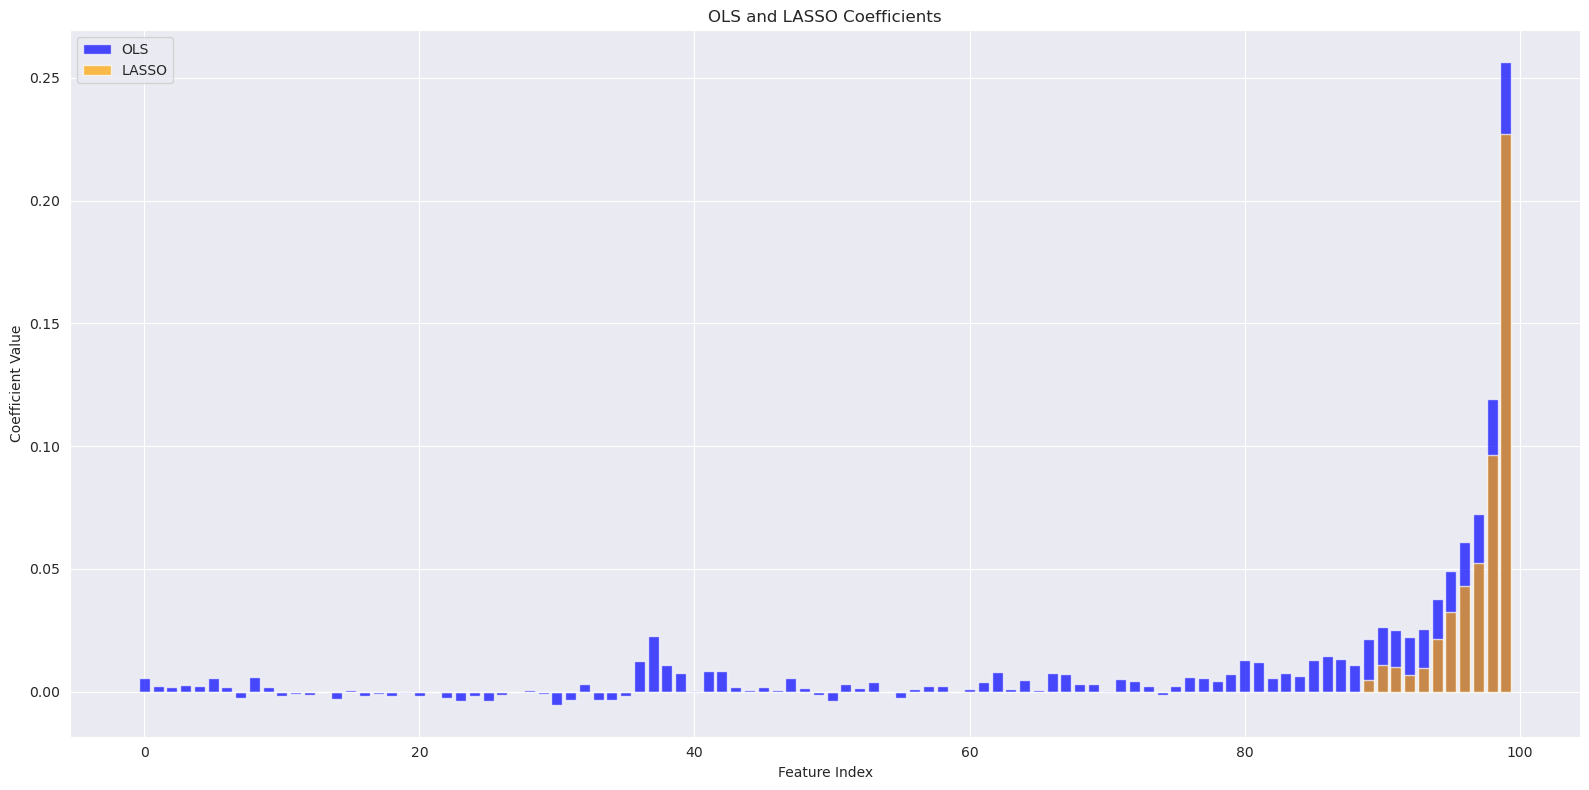

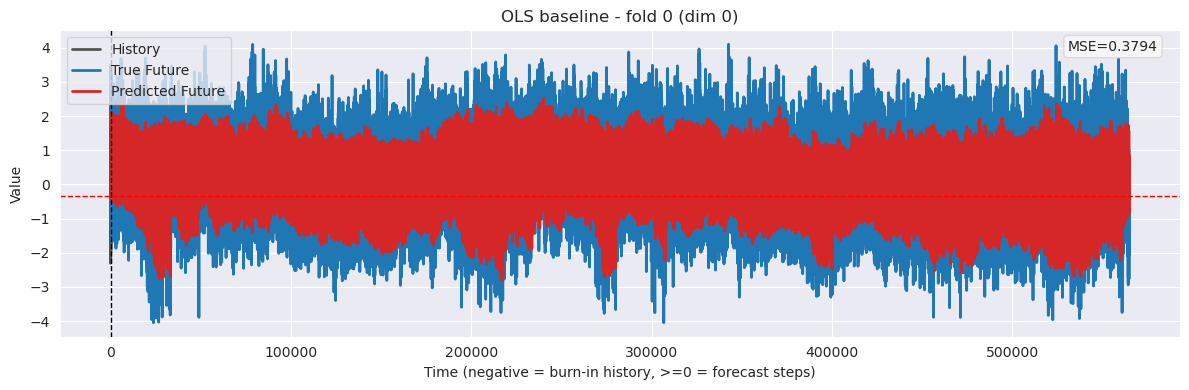

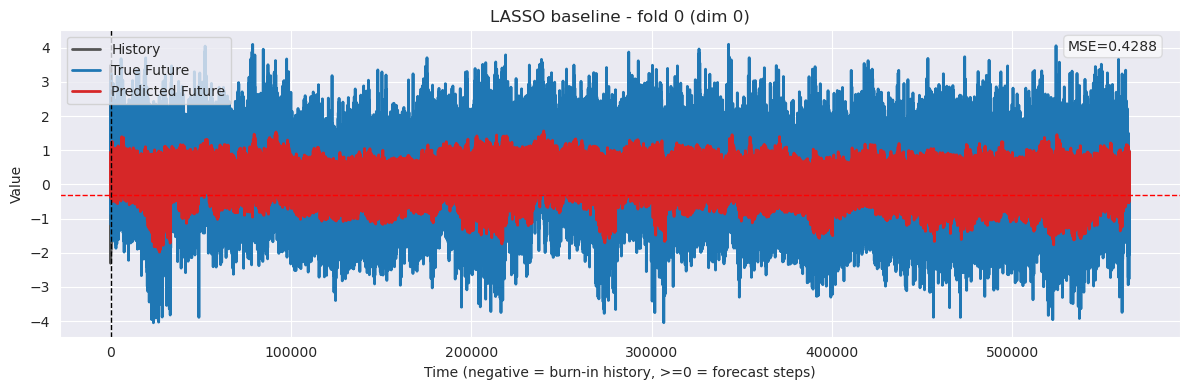

In [13]:

# Align shapes for plotting
y_true_lin = np.asarray(y_test_use[:len(X_test_use)])
if y_true_lin.ndim == 1:
    y_true_lin = y_true_lin.reshape(-1, 1)
if yhat_te_ols.ndim == 1:
    yhat_te_ols = yhat_te_ols.reshape(-1, 1)
    yhat_te_lasso = yhat_te_lasso.reshape(-1, 1)



plt.figure(figsize=(16, 8))
plt.title("OLS and LASSO Coefficients")
plt.bar(range(len(ols.coef_)), ols.coef_, color='blue', alpha=0.7, label="OLS")
plt.bar(range(len(lasso.coef_)), lasso.coef_, color='orange', alpha=0.7, label="LASSO")
plt.legend()
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.grid(True)
plt.tight_layout()
plt.show()

plot_forecast_overlay(X_test_use[0], y_true_lin, yhat_te_ols, title=f"OLS baseline - fold {fold_num}")
plot_forecast_overlay(X_test_use[0], y_true_lin, yhat_te_lasso, title=f"LASSO baseline - fold {fold_num}")


<Figure size 1000x600 with 0 Axes>

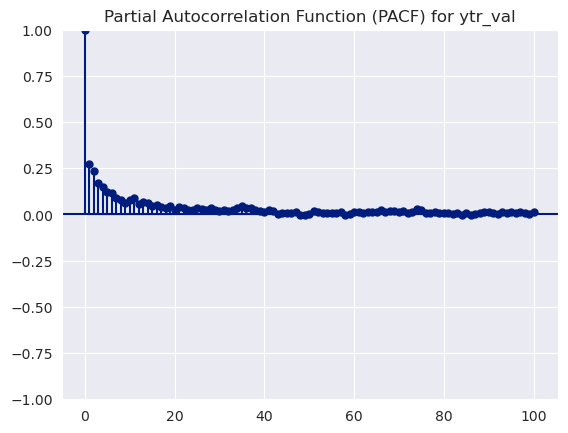

In [14]:
from statsmodels.graphics.tsaplots import plot_pacf

import matplotlib.pyplot as plt

# Plot PACF for ytr_val
plt.figure(figsize=(10, 6))
plot_pacf(y_test_use, lags=100, method='ywm', alpha=0.05)
plt.title("Partial Autocorrelation Function (PACF) for ytr_val")
plt.show()

In [15]:
@torch.inference_mode()
def probe_num(model, cfg, size, num=1, limit=None, autoregressive=False, device="cuda"):
    """
    Sequential single-row inference over chronologically sorted X_test.
    For autoregressive=True, we start from X_test[0] and then roll forward
    using our own predictions.
    Returns (y_true, preds) with shape (N, output_dim).
    """
    preds = []
    limit = size if limit is None else limit
    
    X_ar = None

    for i in range(limit):
        x_in = [0] * i + [num] + [0] *(limit-i-1)
        x_in = np.array(x_in)

        # Debug: check shapes
        # print("x_in shape:", np.asarray(x_in).shape)

        xb = _prepare_batch(cfg, x_in).to(device)  # should match training input shape
        pb = model(xb).detach().cpu().numpy().reshape(-1)  # (output_dim,)
        preds.append(pb)

        if autoregressive:
            # assume scalar output; if multi-dim adjust accordingly
            next_val = pb[0]

            # x_in is a window of length L; we drop the first element and append the prediction
            x_in = np.asarray(x_in)
            next_window = np.concatenate([x_in[1:], [next_val]])

            # store new window in buffer
            X_ar.append(next_window)

    preds = np.vstack(preds)  # (N, output_dim)

    return preds.reshape(-1)

@torch.inference_mode()
def test_random_uniform(model, cfg, size, low=-1.0, high=1.0, n_samples=100, seed=None, device="cuda"):
    """
    Feed the model random uniform noise vectors of dimension `size`.
    Returns predictions of shape (n_samples,).
    """
    if seed is not None:
        np.random.seed(seed)

    preds = []

    for _ in range(n_samples):
        x_in = np.random.uniform(low, high, size=size).astype(float)
        xb = _prepare_batch(cfg, x_in).to(device)
        pb = model(xb).detach().cpu().numpy().reshape(-1)
        preds.append(pb)

    preds = np.vstack(preds)  # (n_samples, output_dim)
    return preds.squeeze()



@torch.inference_mode()
def test_gaussian_noise(model, cfg, size, mean=0.0, std=1.0, n_samples=100, seed=None, device="cuda"):
    """
    Feed the model random Gaussian noise vectors N(mean, std^2)
    of dimension `size`.
    Returns predictions of shape (n_samples,).
    """
    if seed is not None:
        np.random.seed(seed)

    preds = []

    for _ in range(n_samples):
        x_in = np.random.normal(loc=mean, scale=std, size=size).astype(float)
        xb = _prepare_batch(cfg, x_in).to(device)
        pb = model(xb).detach().cpu().numpy().reshape(-1)
        preds.append(pb)

    preds = np.vstack(preds)
    return preds.squeeze()




In [16]:
from models import create_model
import json
from pathlib import Path

# Normalize MSE by target variance on each split
USE_NMSE = True
MERGE_TRAIN_VAL = False



# =========================
# Utilities
# =========================
def load_cfg(base) -> AppConfig:
    cfg_json = json.loads((base / "config_snapshot.json").read_text())
    return AppConfig.from_dict(cfg_json["cfg"])

def _infer_lstm_input_size_from_ckpt(state_dict: dict) -> int | None:
    # look for first LSTM weight_ih
    for k, v in state_dict.items():
        if k.endswith("lstm_layers.0.weight_ih_l0") or ("lstm_layers.0.weight_ih_l0" in k):
            # shape is [4*H, input_size]
            return int(v.shape[1])
    # legacy single-module naming (if any)
    for k, v in state_dict.items():
        if k.endswith("lstm.weight_ih_l0") or ("lstm.weight_ih_l0" in k):
            return int(v.shape[1])
    return None

def _make_input_shape_for_eval(cfg, X_sample: torch.Tensor | np.ndarray, state_dict: dict):
    name = cfg.model.name.lower()
    # infer T and (optional) D from the data
    if isinstance(X_sample, np.ndarray):
        shape = X_sample.shape
    else:
        shape = tuple(X_sample.shape)
    # shape is typically (N, T) or (N, T, D)
    if len(shape) == 2:
        _, T = shape
        D_data = 1
    elif len(shape) == 3:
        _, T, D_data = shape
    else:
        raise ValueError(f"Unexpected batch shape for X: {shape}")

    if name == "lstm":
        D_ckpt = _infer_lstm_input_size_from_ckpt(state_dict)
        D = D_ckpt if D_ckpt is not None else D_data  # prefer ckpt
        return (T, D)
    elif name == "simplecnn":
        # your CNN expects (C, L) with C=1
        return (1, T)
    elif name == "mlp":
        # your MLP code expects (T,) as before (flattened window)
        return (T,)
    else:
        raise ValueError(f"Unknown model name: {cfg.model.name}")

@torch.inference_mode()
def _predict_batched(model, X, device="cuda", bs=8192):
    preds = []
    for i in range(0, len(X), bs):
        xb = torch.as_tensor(X[i:i+bs], dtype=torch.float32, device=device)
        pb = model(xb).detach().cpu()
        preds.append(pb)
    return torch.cat(preds, dim=0).numpy()

def load_and_predict_nn(base_path, fold_idx, X_test, device="cuda"):
    """Load NN model for given fold and make predictions on test set."""
    try:
        base_path = Path(base_path)
        cfg = load_cfg(base_path)
        # Load checkpoint
        ckpt_path = base_path / f"fold_{fold_idx:03d}" / "model_best.pt"
        if not ckpt_path.exists():
            return None
        
        checkpoint = torch.load(ckpt_path, map_location=device)
        state_dict = {k.replace("_orig_mod.", ""): v for k, v in checkpoint["model_state"].items()}
        
        # Infer shapes
        input_shape = _make_input_shape_for_eval(cfg, X_test, state_dict)
        output_shape = cfg.walkforward.lookback + 1 if cfg.walkforward.lookback is not None else 1
        
        # Create and load model
        model = create_model(cfg.model, input_shape, output_shape)
        model.load_state_dict(state_dict, strict=True)
        model.to(device).eval()
        
        # Make predictions
        yhat = _predict_batched(model, X_test, device=device, bs=8192)
        
        # Cleanup
        del model, checkpoint
        torch.cuda.empty_cache()
        
        return yhat
        
    except Exception as e:
        print(f"Error loading/predicting fold {fold_idx}: {e}")
        return None


In [35]:
from sklearn.metrics import mean_squared_error
import os 
import json 

names = ["exp_038_mlp_100_adam_lr", "exp_035_mlp_100_muon_lr"]
cfgs = [cfg_mlp, cfg_mlp]
print(names)


fold_num = 0
checkpoints = []
base_paths = []
lr_list = []
val_mses = []
for name in names:
    try:
        base = f"{VOL_EXPERIMENTS_DIR}/{name}/trial_search_best/"
        ckpt_path = f"{base}fold_{fold_num:03d}/model_best.pt"
        checkpoint = torch.load(ckpt_path, map_location=DEVICE)
        checkpoints.append(checkpoint)
        base_paths.append(base)
        conifg_path = f"{base}config_snapshot.json"

        print(ckpt_path)
        with open(conifg_path, 'r') as f:
            cfg = json.load(f)

        cfg = cfg["cfg"]

        cfg = AppConfig.from_dict(cfg)
        print(f"optimizer: {cfg.trainer.hparams.get("optimizer_type")}")
        print(f"weight_decay: {cfg.trainer.hparams.get("weight_decay")}")
        lr = cfg.trainer.hparams.get("lr")
        print(f"learning rate: {lr}")
        lr_list.append(lr)
        print()

    except FileNotFoundError:
        continue

def mse(y_true, y_pred, limit=None):
    # Use first output dim (adjust if you care about others)
    return mean_squared_error(y_true, y_pred)

models = []
for i, (ckpt, path) in enumerate(zip(checkpoints, base_paths)):
    model = build_model_from_checkpoint(cfgs[i], ckpt, Xte[0])
    ytr_hat = load_and_predict_nn(path, 0, Xtr)
    yval_hat = load_and_predict_nn(path, 0, Xv)
    yte_hat = load_and_predict_nn(path, 0, Xte)

    # Use infer_sequential to predict y's and compute mse
    #y_true_seq_train, y_pred_seq_train = infer_sequential(model, cfg_lstm, Xtr, ytr)
    #y_true_seq_val, y_pred_seq_val = infer_sequential(model, cfg_lstm, Xv, yv)
    #y_true_seq_test, y_pred_seq_test = infer_sequential(model, cfg_lstm, Xte, yte)

    #mse_train_seq = mse(y_true_seq_train, y_pred_seq_train)
    #mse_val_seq = mse(y_true_seq_val, y_pred_seq_val)
    #mse_test_seq = mse(y_true_seq_test, y_pred_seq_test)

    models.append(model)
    mse_train = mse(ytr_hat, ytr)
    mse_val   = mse(yval_hat,  yv)
    mse_test  = mse(yte_hat, yte)
    val_mses.append(mse_val)


    print(f"Model {i}: train={mse_train:.6f}  val={mse_val:.6f}  test={mse_test:.6f}")
    #print(f"Sequential MSE: train={mse_train_seq:.6f}  val={mse_val_seq:.6f}  test={mse_test_seq:.6f}")



['exp_038_mlp_100_adam_lr', 'exp_035_mlp_100_muon_lr']
/orcd/home/002/corte911/code/finNN_code/src/volatility/experiments/exp_038_mlp_100_adam_lr/trial_search_best/fold_000/model_best.pt
optimizer: adam
weight_decay: 1e-2
learning rate: 0.00019243322503857425

/orcd/home/002/corte911/code/finNN_code/src/volatility/experiments/exp_035_mlp_100_muon_lr/trial_search_best/fold_000/model_best.pt
optimizer: muon
weight_decay: 0.91
learning rate: 0.00019243322503857425

Model 0: train=0.432865  val=0.422177  test=0.378752
Model 1: train=0.436436  val=0.426993  test=0.381013


In [18]:
from sklearn.metrics import mean_squared_error
import os 
import json 

#name = "exp_034_cnn_100_muon_lr"

fold_num = 0
checkpoints = []
base_paths = []
lr_list = []
val_mses = []
for trial in os.listdir(f"{VOL_EXPERIMENTS_DIR}/{name}")[:-1]:
    try:
        base = f"{VOL_EXPERIMENTS_DIR}/{name}/{trial}/"
        ckpt_path = f"{base}fold_{fold_num:03d}/model_best.pt"
        checkpoint = torch.load(ckpt_path, map_location=DEVICE)
        checkpoints.append(checkpoint)
        base_paths.append(base)
        conifg_path = f"{base}config_snapshot.json"

        print(ckpt_path)
        with open(conifg_path, 'r') as f:
            cfg = json.load(f)

        cfg = cfg["cfg"]

        cfg = AppConfig.from_dict(cfg)
        print(f"optimizer: {cfg.trainer.hparams.get("optimizer_type")}")
        print(f"weight_decay: {cfg.trainer.hparams.get("weight_decay")}")
        lr = cfg.trainer.hparams.get("lr")
        lr_list.append(lr)
        print(f"learning rate: {lr}")
        print()

    except FileNotFoundError:
        continue

def mse(y_true, y_pred, limit=None):
    # Use first output dim (adjust if you care about others)
    return mean_squared_error(y_true, y_pred)

models = []
for i, (ckpt, path) in enumerate(zip(checkpoints, base_paths)):
    model = build_model_from_checkpoint(cfg_cnn, ckpt, Xte[0])
    ytr_hat = load_and_predict_nn(path, 0, Xtr)
    yval_hat = load_and_predict_nn(path, 0, Xv)
    yte_hat = load_and_predict_nn(path, 0, Xte)

    # Use infer_sequential to predict y's and compute mse
    #y_true_seq_train, y_pred_seq_train = infer_sequential(model, cfg_lstm, Xtr, ytr)
    #y_true_seq_val, y_pred_seq_val = infer_sequential(model, cfg_lstm, Xv, yv)
    #y_true_seq_test, y_pred_seq_test = infer_sequential(model, cfg_lstm, Xte, yte)

    #mse_train_seq = mse(y_true_seq_train, y_pred_seq_train)
    #mse_val_seq = mse(y_true_seq_val, y_pred_seq_val)
    #mse_test_seq = mse(y_true_seq_test, y_pred_seq_test)

    models.append(model)
    mse_train = mse(ytr_hat, ytr)
    mse_val   = mse(yval_hat,  yv)
    mse_test  = mse(yte_hat, yte)
    val_mses.append(mse_val)

    print(f"Model {i}: train={mse_train:.6f}  val={mse_val:.6f}  test={mse_test:.6f}")
    #print(f"Sequential MSE: train={mse_train_seq:.6f}  val={mse_val_seq:.6f}  test={mse_test_seq:.6f}")



/orcd/home/002/corte911/code/finNN_code/src/volatility/experiments/exp_039_lstm_100_adam_lr/trial_000_000/fold_000/model_best.pt
optimizer: adam
weight_decay: 3e-3
learning rate: 0.037460266483547784

/orcd/home/002/corte911/code/finNN_code/src/volatility/experiments/exp_039_lstm_100_adam_lr/trial_000_001/fold_000/model_best.pt
optimizer: adam
weight_decay: 3e-3
learning rate: 0.09507192349792752

/orcd/home/002/corte911/code/finNN_code/src/volatility/experiments/exp_039_lstm_100_adam_lr/trial_000_002/fold_000/model_best.pt
optimizer: adam
weight_decay: 3e-3
learning rate: 0.0732020742417224

/orcd/home/002/corte911/code/finNN_code/src/volatility/experiments/exp_039_lstm_100_adam_lr/trial_000_004/fold_000/model_best.pt
optimizer: adam
weight_decay: 3e-3
learning rate: 0.01561030385783923

/orcd/home/002/corte911/code/finNN_code/src/volatility/experiments/exp_039_lstm_100_adam_lr/trial_000_006/fold_000/model_best.pt
optimizer: adam
weight_decay: 3e-3
learning rate: 0.005817780380698264


RuntimeError: Error(s) in loading state_dict for CNN1D:
	Missing key(s) in state_dict: "conv_blocks.0.weight", "conv_blocks.0.bias", "conv_blocks.2.weight", "conv_blocks.2.bias", "conv_blocks.4.weight", "conv_blocks.4.bias", "fc.0.weight", "fc.0.bias", "fc.2.weight", "fc.2.bias", "fc.4.weight", "fc.4.bias". 
	Unexpected key(s) in state_dict: "lstm_layers.0.weight_ih_l0", "lstm_layers.0.weight_hh_l0", "lstm_layers.0.bias_ih_l0", "lstm_layers.0.bias_hh_l0", "lstm_layers.1.weight_ih_l0", "lstm_layers.1.weight_hh_l0", "lstm_layers.1.bias_ih_l0", "lstm_layers.1.bias_hh_l0", "head.0.weight", "head.0.bias", "head.2.weight", "head.2.bias", "head.4.weight", "head.4.bias". 

[0.4221765814161947, 0.42699345569169095]


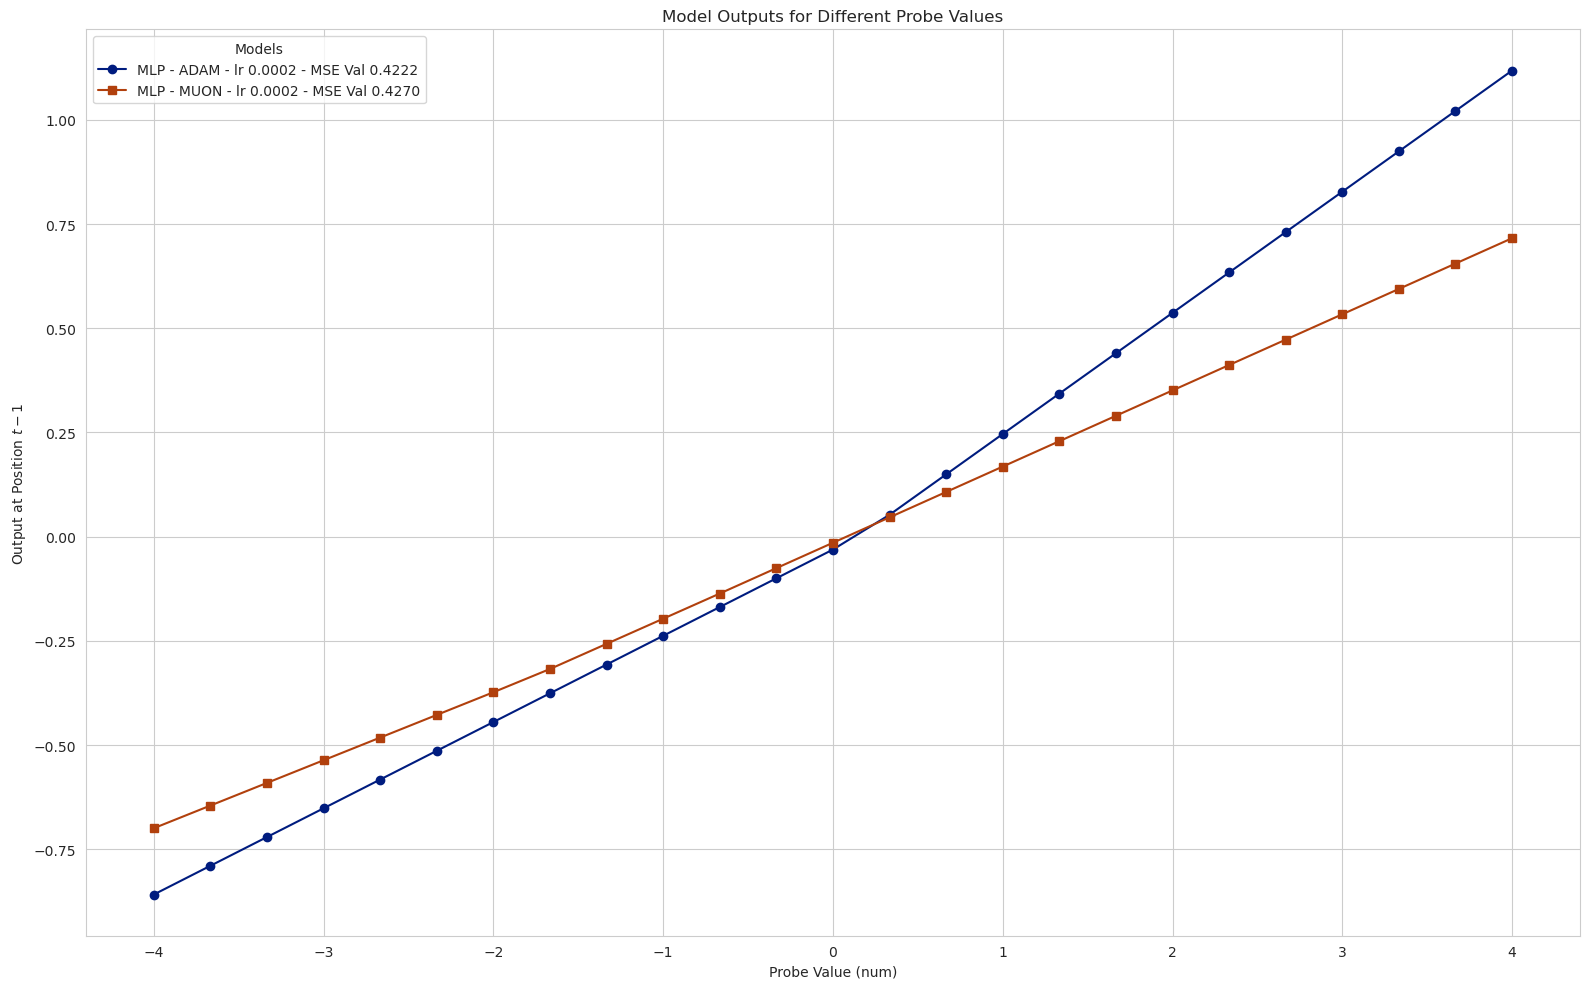

In [37]:
size = 100
ys = []
nums = np.linspace(-4, 4, 25)
sns.set_palette("dark")
plt.figure(figsize=(16, 10))  # Set a larger figure size

#sub = [models[1], models[3]]
names = ["MLP - ADAM", "MLP - MUON"]

markers = ['o', 's', '^', 'D', 'v', 'p', 'X', '*']
print(val_mses)
for i, model in enumerate(models):
    inner_ys = []
    for n in nums:         
        y = probe_num(model, cfgs[i], size, num=n).ravel()[99]
        inner_ys.append(y)

    ys.append(inner_ys)
    plt.plot(nums, inner_ys, label=f"{names[i]} - lr {lr_list[i]:.4f} - MSE Val {val_mses[i]:.4f}", marker=markers[i % len(markers)])  # Allow matplotlib to auto-select marker and linestyle

plt.xlabel("Probe Value (num)")
plt.ylabel(r"Output at Position $t-1$")
plt.title("Model Outputs for Different Probe Values")
plt.legend(title="Models")  # Add a legend with a title
plt.grid(True)
plt.tight_layout()
plt.show()


<Axes: >

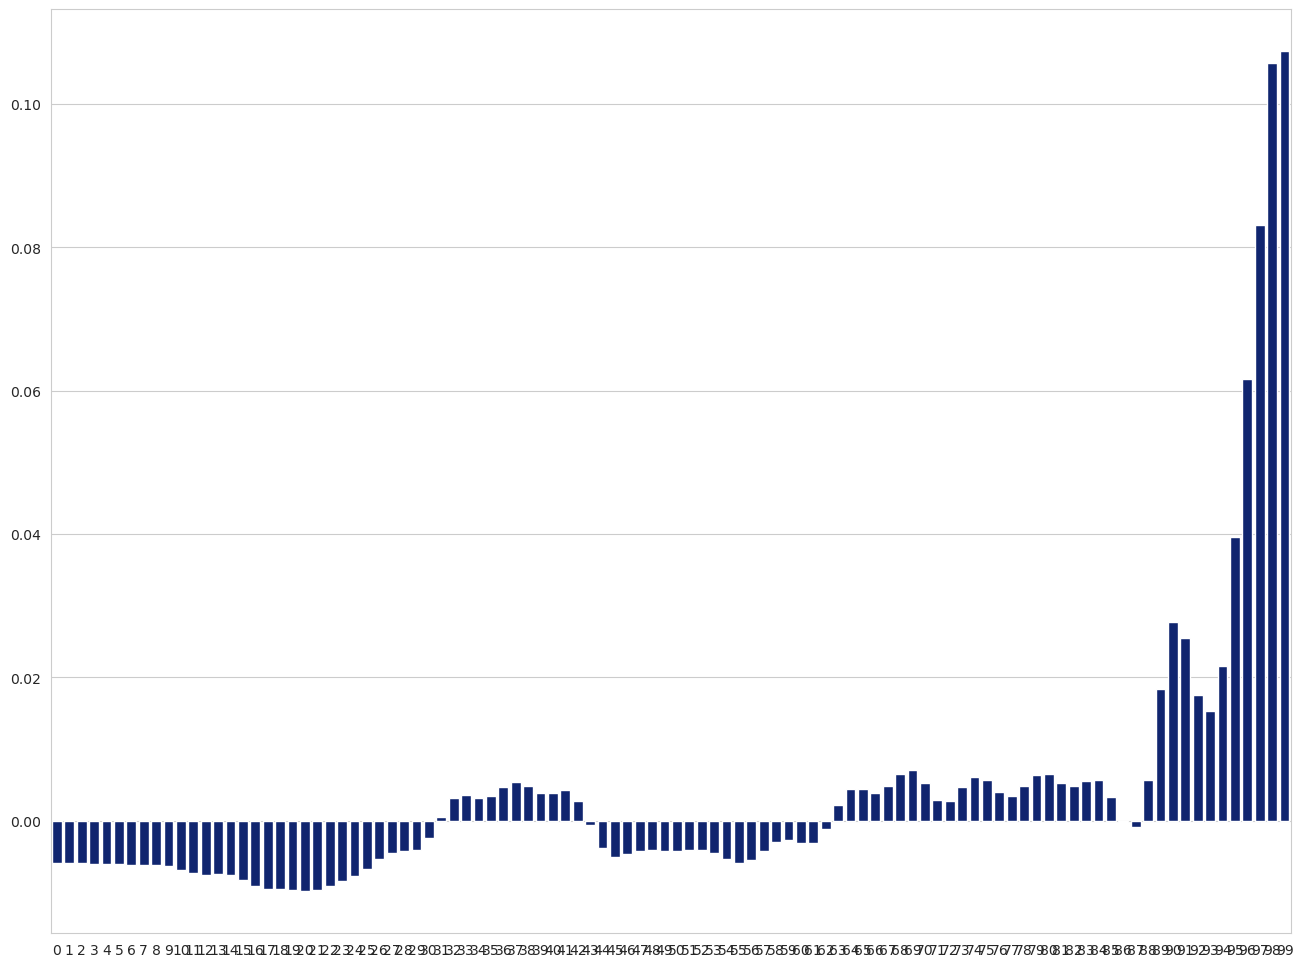

In [ ]:
n = 1
plt.figure(figsize=(16,10))
y_first = probe_num(sub[1], cfg_cnn, size, num=n).ravel()

sns.barplot(y_first)

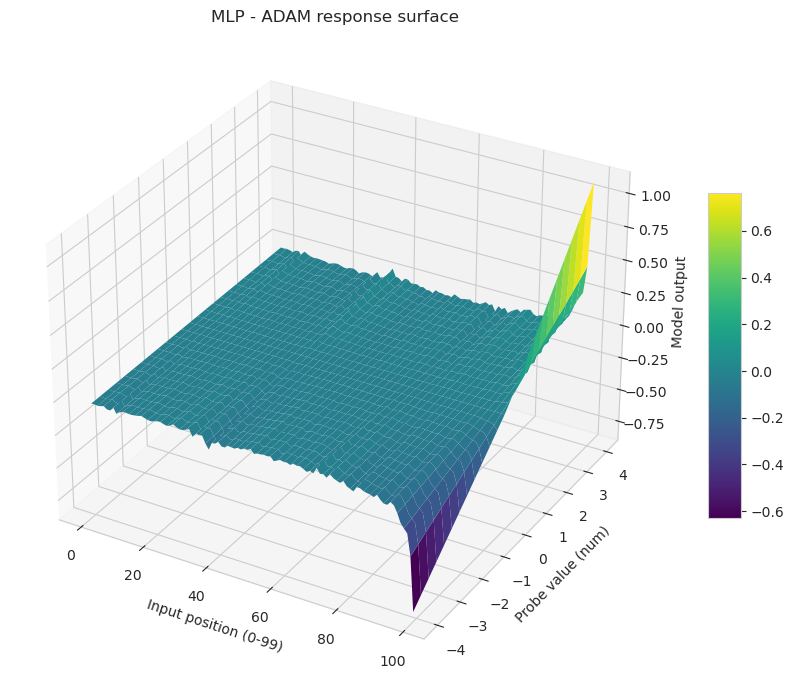

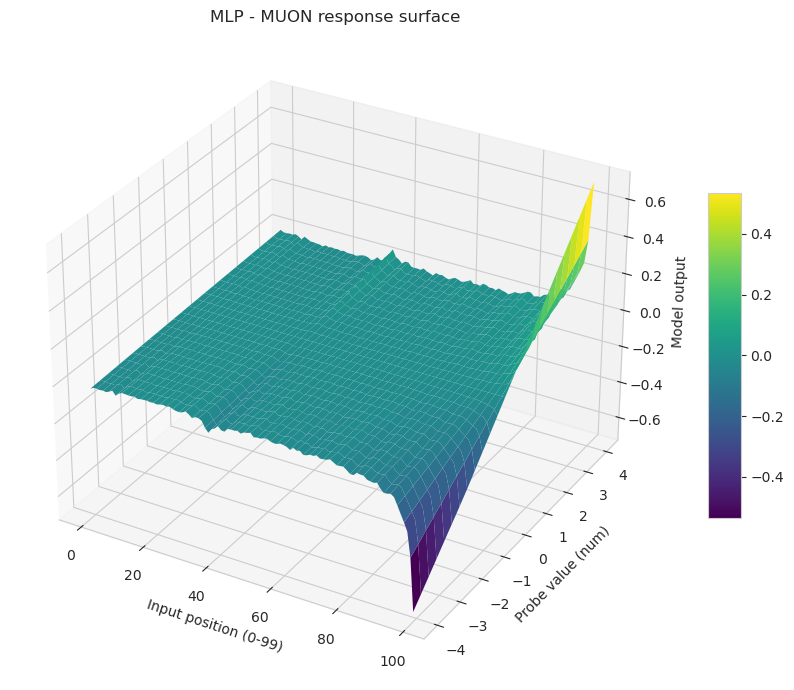

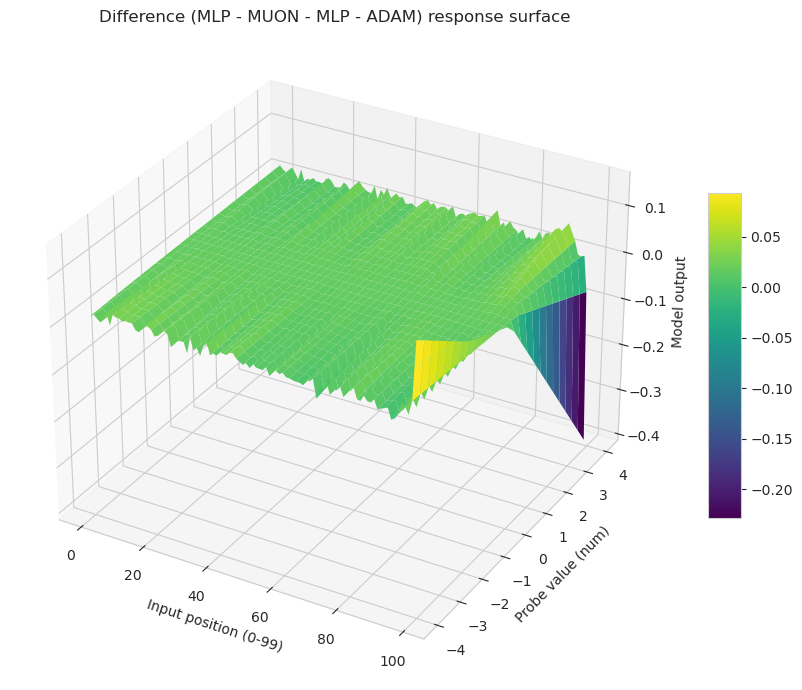

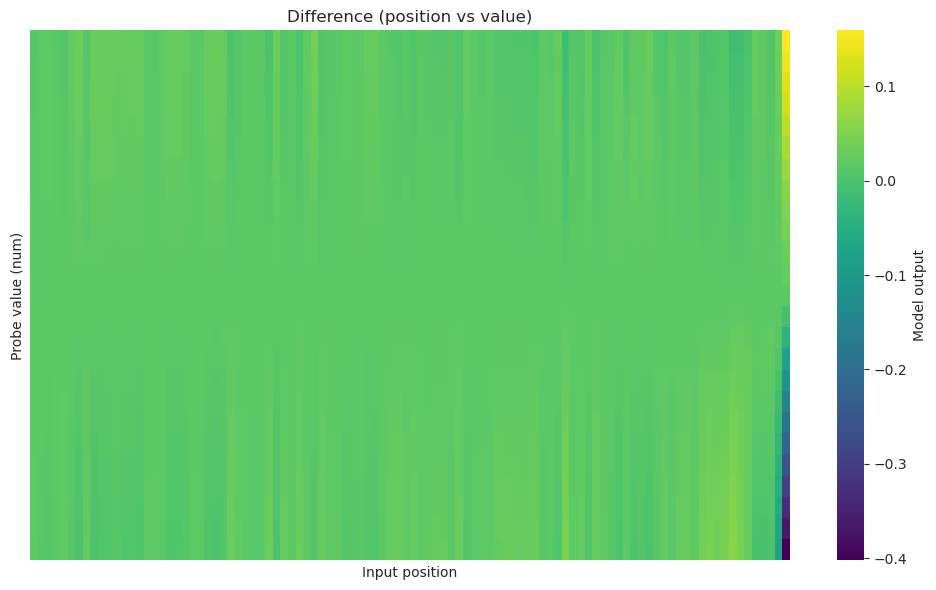

np.float64(1.261882957632055)

In [38]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed for 3d projection

# Set a prettier palette
sns.set_palette("coolwarm")
sns.set_style("whitegrid")

nums = np.linspace(-4, 4, 25)   # values you’re probing
size = 100                      # input dimension

Z_first = np.zeros((len(nums), size))
Z_second = np.zeros((len(nums), size))
#Z_third = np.zeros((len(nums), size))
Z_diff = np.zeros((len(nums), size))

for i, n in enumerate(nums):
    # assuming probe_num returns shape (size,) or (size,1)
    y_first = probe_num(models[0], cfgs[0], size, num=n).ravel()
    y_second = probe_num(models[1], cfgs[1], size, num=n).ravel()
#    y_third = probe_num(models[2], cfgs[2], size, num=n).ravel()

    Z_first[i, :] = y_first
    Z_second[i, :] = y_second
#    Z_third[i, :] = y_third
    Z_diff[i, :] = y_second - y_first

X, Y = np.meshgrid(np.arange(size), nums)  # X: position, Y: num

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z_first, cmap="viridis", linewidth=0, antialiased=True)
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
ax.set_xlabel("Input position (0-99)")
ax.set_ylabel("Probe value (num)")
ax.set_zlabel(f"Model output")
ax.set_title(f"{names[0]} response surface")
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z_second, cmap="viridis", linewidth=0, antialiased=True)
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
ax.set_xlabel("Input position (0-99)")
ax.set_ylabel("Probe value (num)")
ax.set_zlabel(f"Model output")
ax.set_title(f"{names[1]} response surface")
plt.tight_layout()
plt.show()

#fig = plt.figure(figsize=(10, 7))
#ax = fig.add_subplot(111, projection='3d')
#surf = ax.plot_surface(X, Y, Z_third, cmap="viridis", linewidth=0, antialiased=True)
#fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
#ax.set_xlabel("Input position (0-99)")
#ax.set_ylabel("Probe value (num)")
#ax.set_zlabel(f"Model output")
#ax.set_title(f"{names[2]} response surface")
#plt.tight_layout()
#plt.show()

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z_diff, cmap="viridis", linewidth=0, antialiased=True)
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
ax.set_xlabel("Input position (0-99)")
ax.set_ylabel("Probe value (num)")
ax.set_zlabel("Model output")
ax.set_title(f"Difference ({names[1]} - {names[0]}) response surface")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(Z_diff, cmap="viridis", cbar_kws={'label': 'Model output'}, 
            xticklabels=False, yticklabels=False)
plt.xlabel("Input position")
plt.ylabel("Probe value (num)")
plt.title("Difference (position vs value)")
plt.tight_layout()
plt.show()

np.linalg.norm(Z_diff.reshape(-1,1))

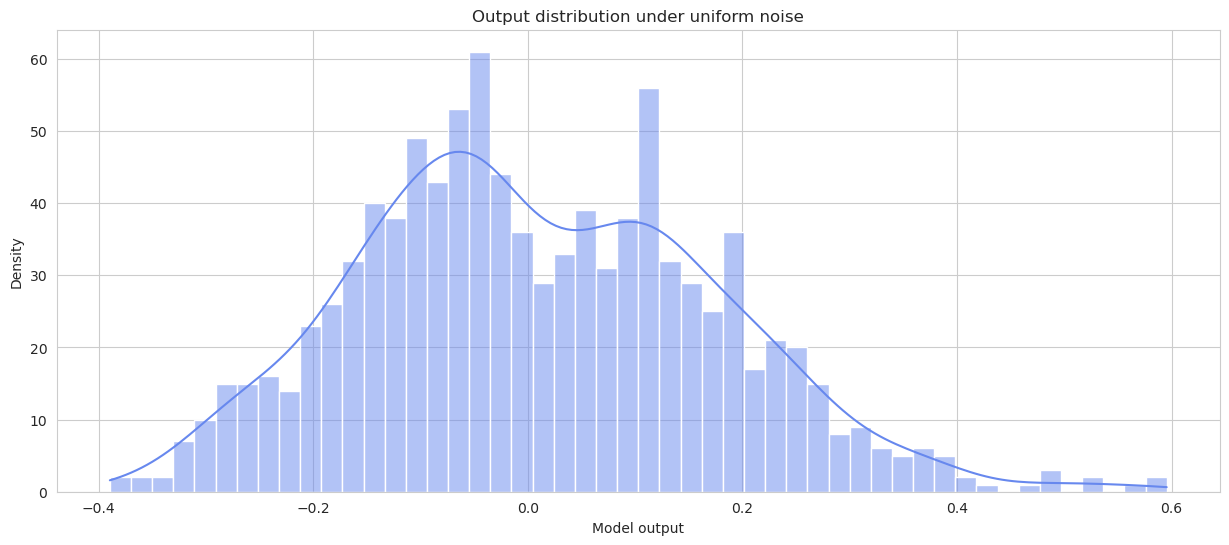

In [ ]:
y_uni = test_random_uniform(model_cnn, cfg_cnn, size=100, n_samples=1000, low=-1, high=1)

plt.figure(figsize=(15,6))
sns.histplot(y_uni, bins=50, kde=True)
plt.xlabel("Model output")
plt.ylabel("Density")
plt.title("Output distribution under uniform noise")
plt.grid(True)
plt.show()


- Gaussian noise is very similar to the orginal input becuase the autocorrelation among features is not statistically significant for the majority of them.

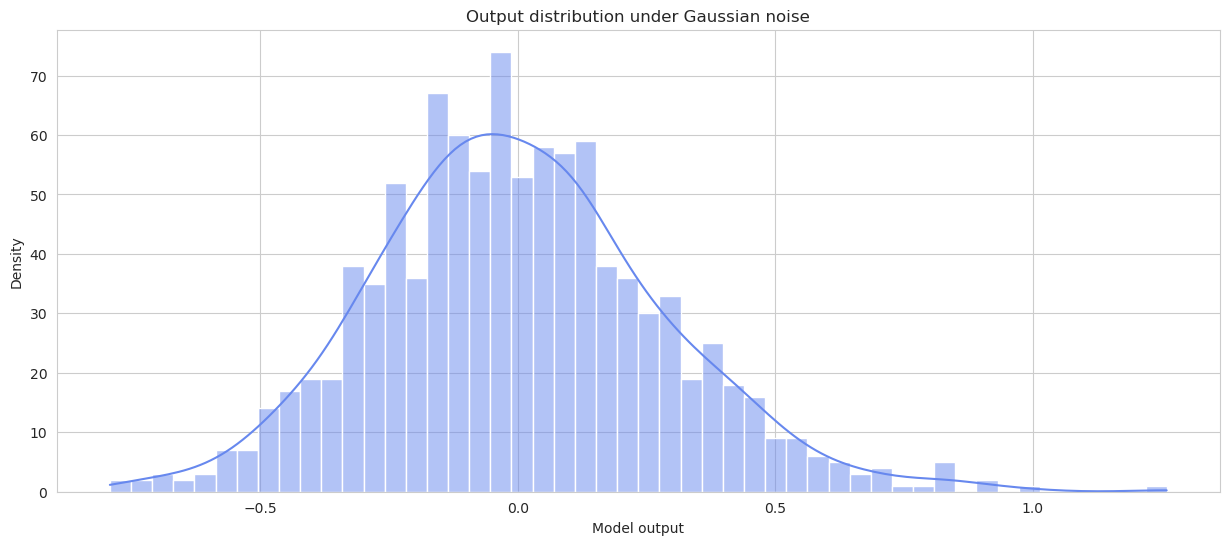

In [ ]:
y_gauss = test_gaussian_noise(model_cnn, cfg_cnn, size=100, n_samples=1000, mean=0.0, std=1)

plt.figure(figsize=(15,6))
sns.histplot(y_gauss, bins=50, kde=True)
plt.xlabel("Model output")
plt.ylabel("Density")
plt.title("Output distribution under Gaussian noise")
plt.grid(True)
plt.show()


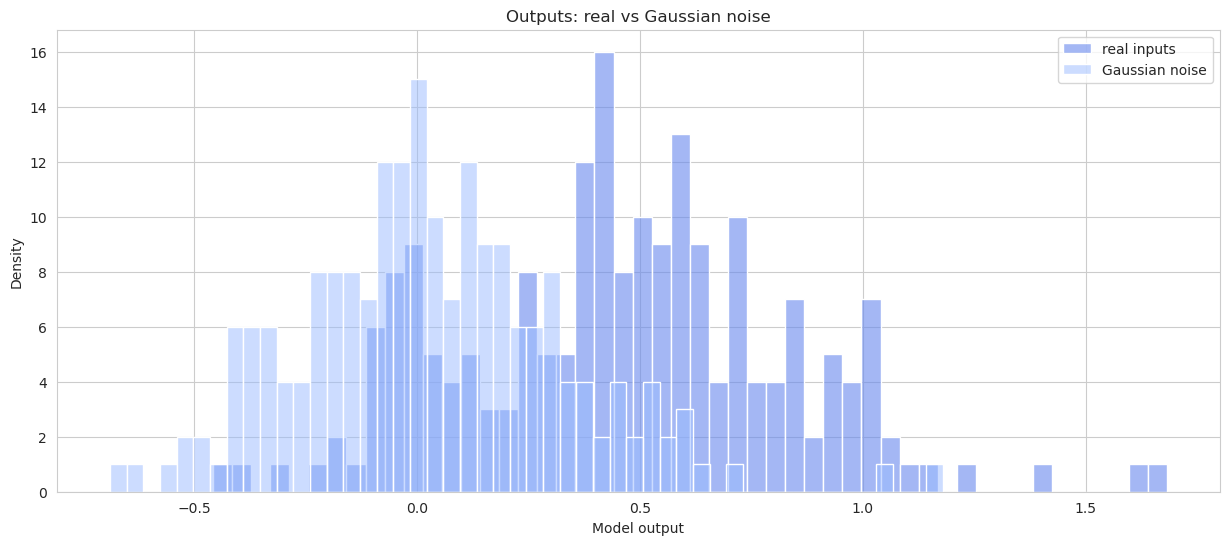

In [ ]:
# Predictions on real test data (first N samples)
N = 200
y_true_real, y_pred_real = infer_sequential(model_cnn, cfg_cnn, X_test_use, y_test_use, limit=N, autoregressive=False)
y_pred_real = y_pred_real[:, 0]  # scalar output

# Predictions on Gaussian noise
y_gauss = test_gaussian_noise(model_cnn, cfg_cnn, size=X_test_use[0].shape[-1],
                              mean=X_test_use[0].mean(), std=1, n_samples=N)

plt.figure(figsize=(15,6))
sns.histplot(y_pred_real, bins=50, alpha=0.6, label="real inputs")
sns.histplot(y_gauss,     bins=50, alpha=0.5, label="Gaussian noise")
plt.xlabel("Model output")
plt.ylabel("Density")
plt.title("Outputs: real vs Gaussian noise")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
def compute_empirical_cov(X):
    """
    X is a list/array of inputs X[i], each can be 1D or 2D;
    we flatten them to compute covariance.
    """
    X_flat = np.array([np.ravel(x) for x in X])  # (N, D)
    mu = X_flat.mean(axis=0)
    cov = np.cov(X_flat, rowvar=False)          # (D, D)
    return mu, cov

@torch.inference_mode()
def perturbate_input(model, cfg, X_test, y_test, limit=None, device="cuda", perturbation="gaussian"):
    """
    Sequential single-row inference over chronologically sorted X_test.
    For autoregressive=True, we start from X_test[0] and then roll forward
    using our own predictions.
    Returns (y_true, preds) with shape (N, output_dim).
    """
    preds = []
    limit = len(X_test) if limit is None else limit

    perturbation = perturbation.lower()

    allowed = ["gaussian", "uniform"]
    assert perturbation in allowed, f"Only {allowed} are allowed as perturbation."

    if perturbation == "gaussian":
        mu, sigma = compute_empirical_cov(X_test)
    
    for i in range(limit):
        x_in = X_test[i]
        if perturbation == "gaussian":
            p = np.random.multivariate_normal(mean=mu, cov=sigma)
            x_in = x_in + p*0.5

        # Debug: check shapes
        # print("x_in shape:", np.asarray(x_in).shape)

        xb = _prepare_batch(cfg, x_in).to(device)  # should match training input shape
        pb = model(xb).detach().cpu().numpy().reshape(-1)  # (output_dim,)
        preds.append(pb)


    preds = np.vstack(preds)  # (N, output_dim)
    y_true = np.asarray(y_test[:limit])
    if y_true.ndim == 1:
        y_true = y_true.reshape(-1, 1)

    return y_true, preds


y_true_per, y_pred_per = perturbate_input(model_cnn, cfg_cnn, X_test_use, y_test_use)
y_true_seq, y_pred_seq_cnn = infer_sequential(model_cnn, cfg_cnn, X_test_use, y_test_use)

# Print
plot_forecast_overlay(X_test_use[0], y_true_seq, y_pred_seq_cnn, title=f"{name} - fold {fold_num}")
plot_forecast_overlay(X_test_use[0], y_true_per, y_pred_per, title=f"Gaussian perturbation  - fold {fold_num}")

KeyboardInterrupt: 